In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
from math import dist
from collections import Counter
import copy
from copy import deepcopy

## 1. Implementar en Python el clasificador de Bayes para patrones normales

In [2]:
#La función decisión nos calcula la función de decisión para alguna mu, sigma y p(c)

In [3]:
def decision(x,m,s,pc):
    return -1/2*np.log(np.linalg.det(s))-1/2*np.transpose(x-m).to_numpy()@np.linalg.inv(s)@(x-m).to_numpy()+np.log(pc)

In [4]:
#Funcion que recibe un punto y lo clasifica
def clasificador(x,mu,sigma,p):
    valor=[0]*len(mu)
    for i in range(len(mu)):
        valor[i]=decision(x,mu[i],sigma[i],p[i])
        d=max(valor)
        indic=valor.index(d)
    return(indic)

## 2.Descargar el conjunto de datos del iris https://archive.ics.uci.edu/ml/datasets/iris

In [5]:
data=pd.read_csv('iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
#Separamos nuestro conjunto en train y test
train , test=sklearn.model_selection.train_test_split(data,test_size=0.3,train_size=0.7,random_state=6)
train['Species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
#Reseteamos el indice del test
test=test.reset_index()

In [8]:
#Separamos nuestro train en las 3 clases (setosa, versicolor y virginica)
train_setosa=train[train['Species']=='setosa']
train_versicolor=train[train['Species']=='versicolor']
train_virginica=train[train['Species']=='virginica']

train_setosa=train_setosa.reset_index()
train_versicolor=train_versicolor.reset_index()
train_virginica=train_virginica.reset_index()
train_setosa=train_setosa.iloc[:,1:]
train_versicolor=train_versicolor.iloc[:,1:]
train_virginica=train_virginica.iloc[:,1:]

### Hacemos un plot con base a dos de las características para ver como se ven nuestras clases c:

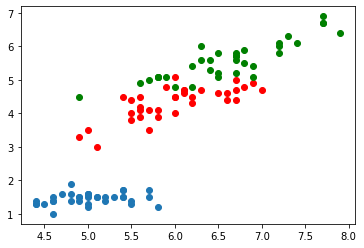

In [9]:
plt.scatter(train_setosa['Sepal.Length'],train_setosa['Petal.Length'])
plt.scatter(train_versicolor['Sepal.Length'],train_versicolor['Petal.Length'],color='red')
plt.scatter(train_virginica['Sepal.Length'],train_virginica['Petal.Length'],color='green')


## 3.Aplicar el algoritmo al conjunto de datos del iris con los valores default del algoritmo

In [10]:
#Calculamos el vector de mu para cada una de las clases del train
mu1=train_setosa.mean()
mu2=train_versicolor.mean()
mu3=train_virginica.mean()

#Definimos la lista con las mu

mu=[mu1,mu2,mu3]


In [11]:
#Calculamos la matriz de covarianzas de cada una de nuestras clases
sigma1=train_setosa.cov().to_numpy()
sigma2=train_versicolor.cov().to_numpy()
sigma3=train_virginica.cov().to_numpy()

#Definimos la lista con las sigmas

sigma=[sigma1,sigma2,sigma3]


In [12]:
#Definimos las p(Ci) para i={1,2,3}. Esta proba la calculé con proba clásica
p1=len(train_setosa)/len(train)
p2=len(train_versicolor)/len(train)
p3=len(train_virginica)/len(train)

#Definimos la lista con las pi
p=[p1,p2,p3]

In [13]:
#Separamos el test en dos conjuntos, el xtest son los datos y el ytest la clasificación real.
test
ytest=test.iloc[:,-1]
#ytest
xtest=test.iloc[:,-5:-1]


### Aplicando el clasificador

In [14]:
#Para cada elemento en xtest encontramos la clase a la que pertence
clasesbayes=[]
for i in range(len(xtest)):
    x=xtest.iloc[i,0:5].to_numpy()
    clasesbayes.append(clasificador(x,mu,sigma,p))
clasesbayes=np.array(clasesbayes)
clasesbayes

array([0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       0])

## 4.Comparar con el algoritmo de vecino más cercano

In [15]:
##Utilizando el KNN de la tarea pasada. Observacion se adpató para el conjunto iris.


def KNN(k,c, punto):
    #Ocupamos cp para guardar la clasificación del punto
    cp=0
    p=0
    #Ocupamos un vector de distancias
    d=[]
    #Copiamos nuestra lista de clasificados
    items=c
    items=deepcopy(c)
    #Ocupamos m para guardar la distancia mínima
    m=0
    #Ocupamos indice para poder extraer el vecino más cercano en la iteración k
    indice=0
    #Ocupamos vecinos para guardar los k vecinos y la clase a la que pertenecen
    vecinos=[]

    #Utilizamos un for para calcular la distancia del punto a cada una de las clasificaciones
    for i in range(len(items)):
        d.append(dist(items[i][0],punto))
    
    #Creamos una lista para poder contar cuantas observaciones e cada clase tenemos
    clases=[]
    #Recorremos el arreglo de distancias tantas veces como k
    #print(d)
    for j in range(k):
        m=min(d)
        indice=d.index(m)
        vecinos.append(items[indice])
        clases.append(items[indice][1])
        d.pop(indice)
        items.pop(indice)
    
    #print(f"Los {k} vecinos más cercanos son",vecinos)
    count=Counter(clases)
    p=max(count.values())
    cp=([l for l,v in count.items() if v == p])
    if len(cp)>1:
        #print("No se pudo clasificar")
        cp=random.randint(0, 2)
    return(cp)
  


In [16]:
#Cambiamos los targets de el conjunto de entrenamiento por 0, 1 y 2
train_setosa['Species']=0
train_versicolor['Species']=1
train_virginica['Species']=2


In [17]:
##Obtenemos los puntos de cada clase en el formato que los requiere el knn
antes=[]
for i in range(len(train_setosa)):
    antes.append([(train_setosa.iloc[i,0],train_setosa.iloc[i,1],train_setosa.iloc[i,2],train_setosa.iloc[i,3]),train_setosa.iloc[i,4]])
    
for j in range(len(train_versicolor)):
    antes.append([(train_versicolor.iloc[j,0],train_versicolor.iloc[j,1],train_versicolor.iloc[j,2],train_versicolor.iloc[j,3]),train_versicolor.iloc[j,4]])    

for k in range(len(train_virginica)):
    antes.append([(train_virginica.iloc[k,0],train_virginica.iloc[k,1],train_virginica.iloc[k,2],train_virginica.iloc[k,3]),train_virginica.iloc[k,4]])
    


In [18]:
##Pasamos cada uno de los puntos del test al formato requerido para aplicar el knn
puntos=[]
for i in range(len(xtest)):
    puntos.append((xtest.iloc[i,0],xtest.iloc[i,1],xtest.iloc[i,2],xtest.iloc[i,3]))


In [19]:
#### Clasificamos cada uno de nuestros puntos del xtest
clasknn=[]
k=3

for i in range(len(puntos)):
    clasknn.append(KNN(k,antes,puntos[i]))


clasificaknn=[]
for v in clasknn:
    for item in v:
        clasificaknn.append(item)
clasificaknn=np.array(clasificaknn)
clasificaknn=clasificaknn.astype('int')
#clasificaknn

### Comparación Bayes vs KNN

In [20]:
clasesbayes

array([0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       0])

In [21]:
clasificaknn

array([0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       0])

In [22]:
clasificaknn==clasesbayes

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

#### Observaciones

Dependiendo de la k que tomemos obtenemos diferentes clasificaciones para nuestro xtest 

    1. Cuando k=1 tenemos 44 coincidencias y difieren en un valor
    2. Cuando k=3 tenemos 43 coincidencias y 2 valores diferentes
    3. Cuando k=5 tenemos 43 coincidencias y 2 valores diferentes

## 5.Reportar: TN,FP, FN, TP, Specificity, Negative rate, precision, recall, accuracy y F1-Score

### Clasificación real(ytest) de los datos del xtest

In [23]:
#Para la clasificacion real (ytest) cambiamos el valor de setosa por 0, versicolor por 1 y virginica por 2 
for i in range(len(ytest)):
    if(ytest[i]=='setosa'):
        ytest[i]=0
    elif(ytest[i]=='versicolor'):
        ytest[i]=1
    else:
        ytest[i]=2
ytest=np.array(ytest)
ytest=ytest.astype('int')
ytest

<ipython-input-23-00ec3514b9d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytest[i]=0
<ipython-input-23-00ec3514b9d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytest[i]=2
<ipython-input-23-00ec3514b9d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytest[i]=1


array([0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       0])

### Comparando Bayes vs clasificacion real


In [24]:
from sklearn.metrics import accuracy_score
print('exactitud:',accuracy_score(clasesbayes,ytest))

exactitud: 0.9777777777777777


In [25]:
from sklearn.metrics import precision_score
print('exactitud:',precision_score(clasesbayes,ytest,average='micro'))

exactitud: 0.9777777777777777


In [26]:
from sklearn.metrics import recall_score
print('exactitud:',recall_score(clasesbayes,ytest,average='micro'))

exactitud: 0.9777777777777777


In [27]:
from sklearn.metrics import f1_score
print('exactitud:',f1_score(clasesbayes,ytest,average='micro'))

exactitud: 0.9777777777777777


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(clasesbayes, ytest, labels=[0, 1,2])

print(cm)

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


In [29]:
tp= cm[0][0]+cm[1][1]+cm[2][2]
tn=cm[0][1]+cm[0][2]+cm[1][0]+cm[1][2]+cm[2][0]+cm[2][1]
fp=cm[0][1]+cm[0][2]+cm[1][2]
fn=cm[2][0]+cm[2][1]+cm[1][0]
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 44
True Negative 1
False Positive 1
False Negative 0


### Comparando KNN vs clasificacion real


In [30]:
from sklearn.metrics import accuracy_score
print('exactitud:',accuracy_score(clasificaknn,ytest))

exactitud: 0.9555555555555556


In [31]:
from sklearn.metrics import precision_score
print('exactitud:',precision_score(clasificaknn,ytest,average='micro'))

exactitud: 0.9555555555555556


In [32]:
from sklearn.metrics import recall_score
print('exactitud:',recall_score(clasificaknn,ytest,average='micro'))

exactitud: 0.9555555555555556


In [33]:
from sklearn.metrics import f1_score
print('exactitud:',f1_score(clasificaknn,ytest,average='micro'))

exactitud: 0.9555555555555556


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(clasificaknn, ytest, labels=[0, 1,2])

print(cm)

[[15  0  0]
 [ 0 15  2]
 [ 0  0 13]]


In [35]:
tp= cm[0][0]+cm[1][1]+cm[2][2]
tn=cm[0][1]+cm[0][2]+cm[1][0]+cm[1][2]+cm[2][0]+cm[2][1]
fp=cm[0][1]+cm[0][2]+cm[1][2]
fn=cm[2][0]+cm[2][1]+cm[1][0]
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 43
True Negative 2
False Positive 2
False Negative 0
